In [1]:
import math_models_population as population
import math_models_util as util

%matplotlib inline

In [2]:
# Solve model

def solveModel(logisticModel):
    t, p = population.solve(logisticModel, maxTime=250)
    population.plot(logisticModel, t, p)

In [3]:
# Make carrying capacity with discrete factors

def carryingCapacityDiscrete():
    # Space
    spaceTechFactor = util.PiecewiseFtn([50, 100], [0.0, 0.10, 0.20])
    spaceEnvFactor = util.PiecewiseFtn([10, 25, 40], [0.0, -0.15, -0.30, -0.35])
    space = population.Dimension('space', [spaceTechFactor, spaceEnvFactor])

    # Water
    waterTechFactor = util.PiecewiseFtn([25, 50], [0.0, 0.10, 0.20])
    waterEnvFactor = util.PiecewiseFtn([10, 20, 30], [-0.05, -0.10, -0.20, -0.25])
    water = population.Dimension('water', [waterTechFactor, waterEnvFactor])

    # Food
    foodTechFactor = util.PiecewiseFtn([70, 100], [0.0, 0.05, 0.10])
    foodEnvFactor = util.PiecewiseFtn([20, 30, 40], [0.0, -0.05, -0.10, -0.15])
    food = population.Dimension('food', [foodTechFactor, foodEnvFactor])
    
    return population.CarryingCapacity(10000000, [space, water, food])

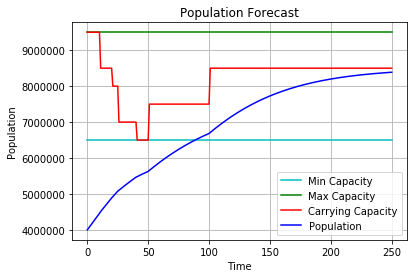

In [4]:
# Solve logistic model with discrete carrying capacity factors

solveModel(population.LogisticModel(0.02, 4000000, carryingCapacityDiscrete()))

In [5]:
# Make carrying capacity with continuous factors

def carryingCapacityContinuous():
    spaceTechFactor = util.PolyChangeFtn(0.2, 100)
    spaceEnvFactor = util.PolyChangeFtn(-0.35, 10)
    space = population.Dimension('space', [spaceTechFactor, spaceEnvFactor])

    waterTechFactor = util.PolyChangeFtn(0.2, 50)
    waterEnvFactor = util.PolyChangeFtn(-0.25, 20)
    water = population.Dimension('water', [waterTechFactor, waterEnvFactor])

    foodTechFactor = util.PolyChangeFtn(0.10, 100)
    foodEnvFactor = util.PolyChangeFtn(-0.15, 20)
    food = population.Dimension('food', [foodTechFactor, foodEnvFactor])

    return population.CarryingCapacity(10000000, [space, water, food])

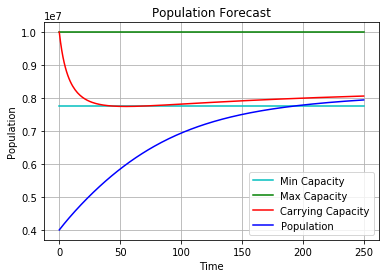

In [6]:
# Solve logistic model with continous carrying capacity factors

solveModel(population.LogisticModel(0.02, 4000000, carryingCapacityContinuous()))